## [**Classical Classifications**](#step5)
## [**Neural Networks - MLP**](#step6)
## [**Neural Networks - CNN Model 1**](#step7)
## [**Neural Networks - CNN Model 2**](#step10)

In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.neural_network as nn
import pickle

from timeit import default_timer as timer

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from keras.utils import np_utils,to_categorical
from keras.optimizers import RMSprop, Adam
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv1D, Conv2D, MaxPooling2D, MaxPooling1D
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from keras import optimizers

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

%matplotlib inline
#pd.set_option("display.max_rows", None, "display.max_columns", None)

train = pd.read_csv('Data/HAR with Smartphones/train.csv')
test = pd.read_csv('Data/HAR with Smartphones/test.csv')

In [2]:
%%html
<style>
table {float:left}
</style>

In [3]:
df = [train, test]
combined = pd.concat(df)

In [4]:
combined

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


In [5]:
X = combined.iloc[:,:-2]
y = combined.iloc[:,-1]

In [6]:
X

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [7]:
y

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
2942    WALKING_UPSTAIRS
2943    WALKING_UPSTAIRS
2944    WALKING_UPSTAIRS
2945    WALKING_UPSTAIRS
2946    WALKING_UPSTAIRS
Name: Activity, Length: 10299, dtype: object

In [8]:
#activity_labels = y.Activity.unique()

In [9]:
if train.isnull().values.any:
    print("Null values in training dataset: none")
else:
    print("Null values detected in training data.")
    
test
if train.isnull().values.any:
    print("Null values in test dataset: none")
else:
    print("Null values detected in test data.")

Null values in training dataset: none
Null values in test dataset: none


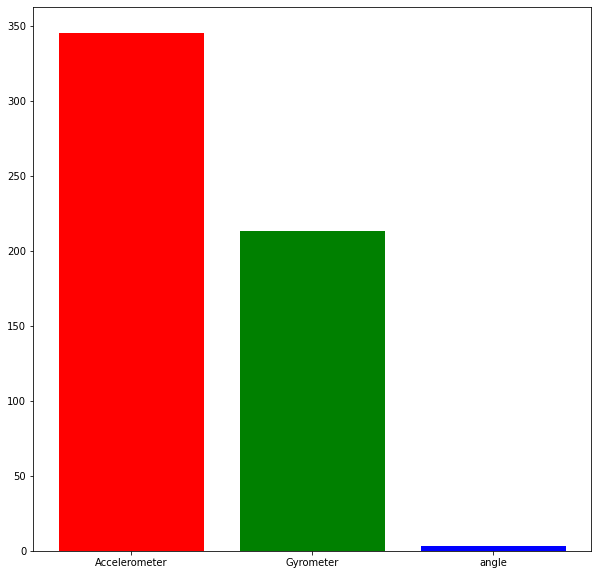

In [10]:
acc=0
gyro=0
angle=0
for column in X.columns:
    if "Acc" in str(column):
        acc += 1
    elif "Gyro" in str(column):
        gyro += 1
    elif "angle" in str(column):
        angle += 1

plt.figure(figsize=(10,10))
bars = plt.bar(['Accelerometer','Gyrometer','angle'],[acc,gyro,angle],color=['r','g','b']);

In [11]:
pd.crosstab(combined.subject, combined.Activity, margins = 1)

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS,All
subject,,,,,,,
1,50,47,53,95,49,53,347
2,48,46,54,59,47,48,302
3,62,52,61,58,49,59,341
4,54,50,56,60,45,52,317
5,52,44,56,56,47,47,302
6,57,55,57,57,48,51,325
7,52,48,53,57,47,51,308
8,54,46,54,48,38,41,281
9,50,50,45,52,42,49,288


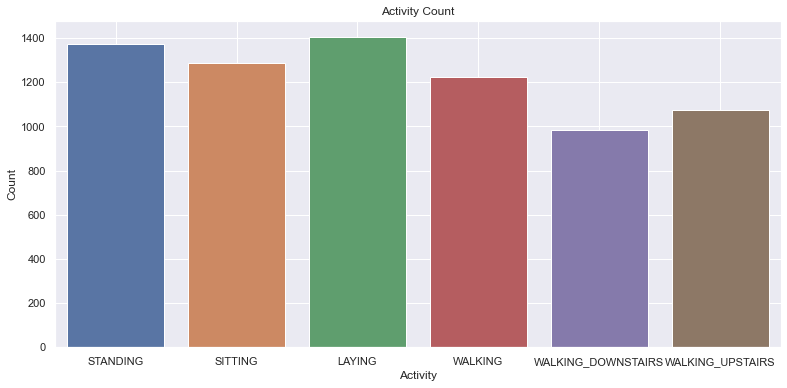

In [12]:
sns.set(rc={'figure.figsize':(13,6)})
fig = sns.countplot(x = "Activity" , data = train)
plt.xlabel("Activity")
plt.ylabel("Count")
plt.title("Activity Count")
plt.grid(True)
plt.show(fig)

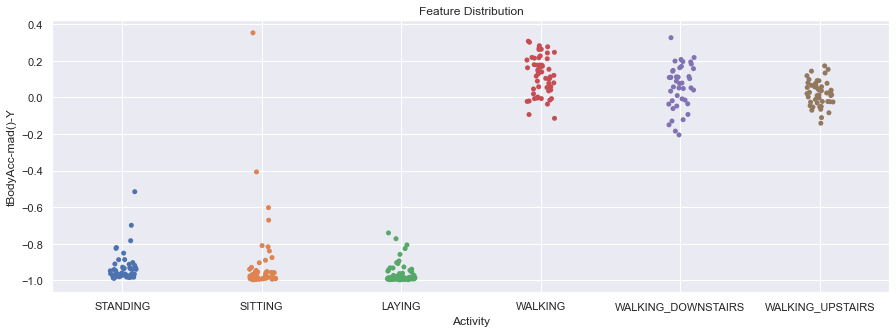

In [13]:
sns.set(rc={'figure.figsize':(15,5)})
fig1 = sns.stripplot(x='Activity', y= train.loc[train['subject']==15].iloc[:,7], data= train.loc[train['subject']==15], jitter=True)
plt.title("Feature Distribution")
plt.grid(True)
plt.show(fig1)

In [14]:
encoder = preprocessing.LabelEncoder()

encoder.fit(y)
y = encoder.fit_transform(y)

In [15]:
encoder.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

<a id='step5'></a>
## Classical classification - _k_-Nearest Neighbours, Logistic Regression

In [16]:
def perform_classical(fold, pca):
    start_time = timer()
    k = fold
    perform_pca = pca
    kf = KFold(n_splits=k, random_state=None)
    knn_model = knn(n_neighbors=50 , n_jobs=2 , weights='distance')
    lr_model = LogisticRegression(solver= 'liblinear')
    
    acc_scores_knn = []
    acc_scores_lr = []
    cv_iteration = 1
    cv_pca_iteration = 1
    
    for train_index, test_index in kf.split(X):
        
        if perform_pca == False:
            print('Training model and cross validate using fold #{}...\n ' .format(cv_iteration))
            cv_iteration += 1
        
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        if perform_pca == True:
            print('Training model with PCA and cross validate using fold #{}...\n ' .format(cv_pca_iteration))
            cv_pca_iteration += 1
            pca = PCA(n_components = 100) # n=100 is the usual consensus in HAR
            X_train = pca.fit_transform(X_train)
            X_test = pca.transform(X_test)
            # pca.explained_variance_ratio_
            
        knn_model.fit(X_train, y_train)
        pred_values_knn = knn_model.predict(X_test)
        acc_knn = accuracy_score(pred_values_knn, y_test)
        acc_scores_knn.append(acc_knn)

        lr_model.fit(X_train,y_train)
        pred_values_lr = lr_model.predict(X_test)
        acc_lr = accuracy_score(pred_values_lr , y_test)
        acc_scores_lr.append(acc_lr)
        
    end_time = timer()
    time_taken = end_time - start_time
    
    return acc_scores_knn, acc_scores_lr, time_taken

### Classical classifications <font color=red>without PCA</font>, 5-fold cross validation.

In [17]:
acc_score_knn, acc_score_lr, time_taken = perform_classical(fold=5, pca=False)

Training model and cross validate using fold #1...
 
Training model and cross validate using fold #2...
 
Training model and cross validate using fold #3...
 
Training model and cross validate using fold #4...
 
Training model and cross validate using fold #5...
 


In [18]:
print('k-Nearest Neighbours - accuracy of each fold:\n {}'.format(acc_score_knn))
print('')
print('Logistic Regression - accuracy of each fold:\n {}'.format(acc_score_lr))
print('')
print('k-Nearest Neighbours - average accuracy in 5-fold = {} with std. deviation {}' 
      .format(np.mean(acc_score_knn), np.std(acc_score_knn)))
print('')
print('Logistic Regression - average accuracy in 5-fold = {} with std. deviation {}'
      .format(np.mean(acc_score_lr), np.std(acc_score_lr)))
print('')
print('Time taken: {:.2f} seconds' .format(time_taken))

k-Nearest Neighbours - accuracy of each fold:
 [0.9087378640776699, 0.8864077669902912, 0.9106796116504854, 0.9097087378640777, 0.878581835842642]

Logistic Regression - accuracy of each fold:
 [0.9509708737864078, 0.929126213592233, 0.9762135922330097, 0.9737864077669903, 0.9713453132588635]

k-Nearest Neighbours - average accuracy in 5-fold = 0.8988231632850333 with std. deviation 0.013573693641390864

Logistic Regression - average accuracy in 5-fold = 0.9602884801275009 with std. deviation 0.017977549602609198

Time taken: 87.55 seconds


k-Nearest Neighbours - accuracy of each fold:
 [0.9087378640776699, 0.8864077669902912, 0.9106796116504854, 0.9097087378640777, 0.878581835842642]

Logistic Regression - accuracy of each fold:
 [0.9509708737864078, 0.929126213592233, 0.9762135922330097, 0.9737864077669903, 0.9713453132588635]

k-Nearest Neighbours - average accuracy in 5-fold: 0.8988231632850333

Logistic Regression - average accuracy in 5-fold: 0.9602884801275009

Time taken: 81.97 seconds

### Classical classifications  <font color=green>with PCA</font>, 5-fold cross validation.

In [19]:
acc_score_knn, acc_score_lr, time_taken = perform_classical(fold=5, pca=True)

Training model with PCA and cross validate using fold #1...
 
Training model with PCA and cross validate using fold #2...
 
Training model with PCA and cross validate using fold #3...
 
Training model with PCA and cross validate using fold #4...
 
Training model with PCA and cross validate using fold #5...
 


In [20]:
print('k-Nearest Neighbours - accuracy of each fold:\n {}'.format(acc_score_knn))
print('')
print('Logistic Regression - accuracy of each fold:\n {}'.format(acc_score_lr))
print('')
print('k-Nearest Neighbours - average accuracy in 5-fold = {} with std. deviation {}' 
      .format(np.mean(acc_score_knn), np.std(acc_score_knn)))
print('')
print('Logistic Regression - average accuracy in 5-fold = {} with std. deviation {}'
      .format(np.mean(acc_score_lr), np.std(acc_score_lr)))
print('')
print('Time taken: {:.2f} seconds' .format(time_taken))

k-Nearest Neighbours - accuracy of each fold:
 [0.9101941747572816, 0.8771844660194175, 0.9009708737864077, 0.9053398058252428, 0.8742107819329772]

Logistic Regression - accuracy of each fold:
 [0.9412621359223301, 0.9053398058252428, 0.95, 0.9315533980582524, 0.9456046624575036]

k-Nearest Neighbours - average accuracy in 5-fold = 0.8935800204642653 with std. deviation 0.01491930959712105

Logistic Regression - average accuracy in 5-fold = 0.9347520004526657 with std. deviation 0.01592464678854193

Time taken: 15.42 seconds


k-Nearest Neighbours - accuracy of each fold:
 [0.912621359223301, 0.875242718446602, 0.9004854368932039, 0.9063106796116505, 0.8742107819329772]

Logistic Regression - accuracy of each fold:
 [0.9383495145631068, 0.904368932038835, 0.95, 0.933495145631068, 0.9456046624575036]

k-Nearest Neighbours - average accuracy in 5-fold: 0.8937741952215468

Logistic Regression - average accuracy in 5-fold: 0.9343636509381026

Time taken: 13.95 seconds

## Neural Networks

<a id='step6'></a>
### Artificial Neural Network - Multilayer Perceptron (MLP)

In [21]:
def perform_mlp(fold, pca):
    start_time = timer()
    k = fold
    perform_pca = pca
    kf = KFold(n_splits=k, random_state=None)
    mlp_sgd_model = nn.MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='sgd', 
                                     alpha=1e-4, early_stopping=True, verbose=1, tol=1e-6, random_state=0,
                                     learning_rate_init=0.001, shuffle=True)

    mlp_adam_model = nn.MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam',
                                      alpha=1e-4, early_stopping=True, verbose=1, tol=1e-6, random_state=0, 
                                      learning_rate_init=0.001, shuffle=True) 

    acc_scores_mlp_sgd = []
    acc_scores_mlp_adam = []
    cv_iteration = 1
    cv_pca_iteration = 1
    
    for train_index, test_index in kf.split(X):
        
        if perform_pca == False:
            print('\nTraining model and cross validate using fold #{}...\n ' .format(cv_iteration))
            cv_iteration += 1
        
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        if perform_pca == True:
            print('\nTraining model with PCA and cross validate using fold #{}...\n ' .format(cv_pca_iteration))
            cv_pca_iteration += 1
            pca = PCA(n_components = 100) # n=100 is the usual consensus in HAR
            X_train = pca.fit_transform(X_train)
            X_test = pca.transform(X_test)
            pca.explained_variance_ratio_

        mlp_sgd_model.fit(X_train, y_train)
        pred_values_mlp_sgd = mlp_sgd_model.predict(X_test)
        acc_sgd = accuracy_score(pred_values_mlp_sgd, y_test)
        acc_scores_mlp_sgd.append(acc_sgd)

        mlp_adam_model.fit(X_train, y_train)
        pred_values_mlp_adam = mlp_adam_model.predict(X_test)
        acc_adam = accuracy_score(pred_values_mlp_adam, y_test)
        acc_scores_mlp_adam.append(acc_adam)
        
    end_time = timer()
    time_taken = end_time - start_time

    return acc_scores_mlp_sgd, acc_scores_mlp_adam, mlp_sgd_model, mlp_adam_model, time_taken

### MLP <font color=red>without PCA</font>, evaluated using 5-fold cross validation

In [22]:
acc_scores_mlp_sgd, acc_scores_mlp_adam, mlp_sgd_model, mlp_adam_model, time_taken = perform_mlp(fold=5, pca=False)


Training model and cross validate using fold #1...
 
Iteration 1, loss = 1.23092928
Validation score: 0.758495
Iteration 2, loss = 0.57103630
Validation score: 0.841019
Iteration 3, loss = 0.42416698
Validation score: 0.875000
Iteration 4, loss = 0.34690797
Validation score: 0.901699
Iteration 5, loss = 0.29796573
Validation score: 0.910194
Iteration 6, loss = 0.26416830
Validation score: 0.918689
Iteration 7, loss = 0.23751156
Validation score: 0.924757
Iteration 8, loss = 0.21707667
Validation score: 0.933252
Iteration 9, loss = 0.20016836
Validation score: 0.940534
Iteration 10, loss = 0.18651813
Validation score: 0.940534
Iteration 11, loss = 0.17488000
Validation score: 0.945388
Iteration 12, loss = 0.16544499
Validation score: 0.952670
Iteration 13, loss = 0.15703043
Validation score: 0.950243
Iteration 14, loss = 0.14952772
Validation score: 0.955097
Iteration 15, loss = 0.14319035
Validation score: 0.952670
Iteration 16, loss = 0.13747844
Validation score: 0.951456
Iteration 1

Iteration 31, loss = 0.08992821
Validation score: 0.966019
Iteration 32, loss = 0.08799829
Validation score: 0.963592
Iteration 33, loss = 0.08638222
Validation score: 0.962379
Iteration 34, loss = 0.08464562
Validation score: 0.966019
Iteration 35, loss = 0.08338608
Validation score: 0.966019
Iteration 36, loss = 0.08160250
Validation score: 0.967233
Iteration 37, loss = 0.08036248
Validation score: 0.967233
Iteration 38, loss = 0.07902960
Validation score: 0.967233
Iteration 39, loss = 0.07843093
Validation score: 0.968447
Iteration 40, loss = 0.07644363
Validation score: 0.969660
Iteration 41, loss = 0.07515338
Validation score: 0.968447
Iteration 42, loss = 0.07418245
Validation score: 0.970874
Iteration 43, loss = 0.07312000
Validation score: 0.969660
Iteration 44, loss = 0.07212151
Validation score: 0.969660
Iteration 45, loss = 0.07101446
Validation score: 0.970874
Iteration 46, loss = 0.06996310
Validation score: 0.973301
Iteration 47, loss = 0.06948423
Validation score: 0.9720

Iteration 35, loss = 0.00738965
Validation score: 0.979369
Iteration 36, loss = 0.00750865
Validation score: 0.978155
Iteration 37, loss = 0.00624512
Validation score: 0.983010
Validation score did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.

Training model and cross validate using fold #4...
 
Iteration 1, loss = 1.24079212
Validation score: 0.708738
Iteration 2, loss = 0.58225543
Validation score: 0.803398
Iteration 3, loss = 0.43633008
Validation score: 0.841019
Iteration 4, loss = 0.35943805
Validation score: 0.872573
Iteration 5, loss = 0.31009157
Validation score: 0.895631
Iteration 6, loss = 0.27511235
Validation score: 0.902913
Iteration 7, loss = 0.24892445
Validation score: 0.916262
Iteration 8, loss = 0.22778628
Validation score: 0.923544
Iteration 9, loss = 0.21094765
Validation score: 0.929612
Iteration 10, loss = 0.19703265
Validation score: 0.930825
Iteration 11, loss = 0.18480426
Validation score: 0.938107
Iteration 12, loss = 0.17454040
Vali

Iteration 39, loss = 0.08362203
Validation score: 0.964806
Iteration 40, loss = 0.08235687
Validation score: 0.968447
Iteration 41, loss = 0.08130074
Validation score: 0.967233
Iteration 42, loss = 0.07983318
Validation score: 0.967233
Iteration 43, loss = 0.07859309
Validation score: 0.968447
Iteration 44, loss = 0.07771400
Validation score: 0.969660
Iteration 45, loss = 0.07651832
Validation score: 0.966019
Iteration 46, loss = 0.07547888
Validation score: 0.969660
Iteration 47, loss = 0.07452304
Validation score: 0.969660
Iteration 48, loss = 0.07370463
Validation score: 0.969660
Iteration 49, loss = 0.07319833
Validation score: 0.968447
Iteration 50, loss = 0.07305880
Validation score: 0.970874
Iteration 51, loss = 0.07115085
Validation score: 0.970874
Iteration 52, loss = 0.07048428
Validation score: 0.970874
Iteration 53, loss = 0.06948055
Validation score: 0.972087
Iteration 54, loss = 0.06851139
Validation score: 0.967233
Iteration 55, loss = 0.06790455
Validation score: 0.9696

In [23]:
print('MLP SGD - accuracy of each fold:\n {}'.format(acc_scores_mlp_sgd))
print('')
print('MLP ADAM - accuracy of each fold:\n {}'.format(acc_scores_mlp_adam))
print('')
print('MLP SGD - average accuracy in 5-fold = {} with std. deviation {}' .format(np.mean(acc_scores_mlp_sgd), np.std(acc_scores_mlp_sgd)))
print('')
print('MLP ADAM - average accuracy in 5-fold = {} with std. deviation {}' .format(np.mean(acc_scores_mlp_adam), np.std(acc_scores_mlp_adam)))
print('')
print('Time taken: {:.2f} seconds' .format(time_taken))

MLP SGD - accuracy of each fold:
 [0.9325242718446602, 0.912621359223301, 0.9436893203883495, 0.9461165048543689, 0.9431762991743565]

MLP ADAM - accuracy of each fold:
 [0.9470873786407767, 0.9262135922330097, 0.970873786407767, 0.9514563106796117, 0.9499757163671685]

MLP SGD - average accuracy in 5-fold = 0.9356255510970073 with std. deviation 0.012416996893081836

MLP ADAM - average accuracy in 5-fold = 0.9491213568656669 with std. deviation 0.01420037237779093

Time taken: 42.16 seconds


MLP SGD - accuracy of each fold:
 [0.9325242718446602, 0.912621359223301, 0.9436893203883495, 0.9461165048543689, 0.9431762991743565]

MLP ADAM - accuracy of each fold:
 [0.9470873786407767, 0.9262135922330097, 0.970873786407767, 0.9514563106796117, 0.9499757163671685]

MLP SGD - average accuracy in 5-fold: 0.9356255510970073

MLP ADAM - average accuracy in 5-fold: 0.9491213568656669

Time taken: 30.83 seconds

### MLP <font color=green>with PCA</font>, evaluated using 5-fold cross validation

In [24]:
acc_scores_mlp_sgd, acc_scores_mlp_adam, mlp_sgd_model, mlp_adam_model, time_taken = perform_mlp(fold=5, pca=True)


Training model with PCA and cross validate using fold #1...
 
Iteration 1, loss = 1.57523580
Validation score: 0.729369
Iteration 2, loss = 0.55664270
Validation score: 0.834951
Iteration 3, loss = 0.41727991
Validation score: 0.879854
Iteration 4, loss = 0.35027415
Validation score: 0.891990
Iteration 5, loss = 0.30953108
Validation score: 0.906553
Iteration 6, loss = 0.27929282
Validation score: 0.913835
Iteration 7, loss = 0.25770821
Validation score: 0.927184
Iteration 8, loss = 0.23862756
Validation score: 0.923544
Iteration 9, loss = 0.22345974
Validation score: 0.933252
Iteration 10, loss = 0.21140556
Validation score: 0.933252
Iteration 11, loss = 0.20067390
Validation score: 0.933252
Iteration 12, loss = 0.19168724
Validation score: 0.934466
Iteration 13, loss = 0.18347316
Validation score: 0.933252
Iteration 14, loss = 0.17640992
Validation score: 0.938107
Iteration 15, loss = 0.16963335
Validation score: 0.941748
Iteration 16, loss = 0.16369934
Validation score: 0.942961
It

Iteration 41, loss = 0.09097435
Validation score: 0.957524
Iteration 42, loss = 0.08988103
Validation score: 0.955097
Iteration 43, loss = 0.08898345
Validation score: 0.956311
Iteration 44, loss = 0.08764301
Validation score: 0.952670
Iteration 45, loss = 0.08679519
Validation score: 0.957524
Iteration 46, loss = 0.08553893
Validation score: 0.958738
Iteration 47, loss = 0.08497092
Validation score: 0.957524
Iteration 48, loss = 0.08381899
Validation score: 0.957524
Iteration 49, loss = 0.08302152
Validation score: 0.958738
Iteration 50, loss = 0.08281587
Validation score: 0.958738
Iteration 51, loss = 0.08111174
Validation score: 0.959951
Iteration 52, loss = 0.08020296
Validation score: 0.957524
Iteration 53, loss = 0.07954089
Validation score: 0.957524
Iteration 54, loss = 0.07869840
Validation score: 0.959951
Iteration 55, loss = 0.07806252
Validation score: 0.956311
Iteration 56, loss = 0.07750988
Validation score: 0.958738
Iteration 57, loss = 0.07662816
Validation score: 0.9587

Iteration 64, loss = 0.08821848
Validation score: 0.952670
Iteration 65, loss = 0.08679370
Validation score: 0.952670
Iteration 66, loss = 0.08625115
Validation score: 0.955097
Iteration 67, loss = 0.08561796
Validation score: 0.957524
Validation score did not improve more than tol=0.000001 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.78296420
Validation score: 0.838592
Iteration 2, loss = 0.31963961
Validation score: 0.934466
Iteration 3, loss = 0.19552707
Validation score: 0.946602
Iteration 4, loss = 0.15251519
Validation score: 0.949029
Iteration 5, loss = 0.12818069
Validation score: 0.953883
Iteration 6, loss = 0.11223596
Validation score: 0.951456
Iteration 7, loss = 0.10031144
Validation score: 0.952670
Iteration 8, loss = 0.09156083
Validation score: 0.953883
Iteration 9, loss = 0.08410018
Validation score: 0.957524
Iteration 10, loss = 0.07824076
Validation score: 0.959951
Iteration 11, loss = 0.07284681
Validation score: 0.957524
Iteration 12, loss = 0.06850622

Iteration 21, loss = 0.14388752
Validation score: 0.930825
Iteration 22, loss = 0.13996450
Validation score: 0.929612
Iteration 23, loss = 0.13644256
Validation score: 0.930825
Iteration 24, loss = 0.13409638
Validation score: 0.933252
Iteration 25, loss = 0.13076972
Validation score: 0.933252
Iteration 26, loss = 0.12818128
Validation score: 0.933252
Iteration 27, loss = 0.12567932
Validation score: 0.933252
Iteration 28, loss = 0.12360478
Validation score: 0.935680
Iteration 29, loss = 0.12182650
Validation score: 0.936893
Iteration 30, loss = 0.11933507
Validation score: 0.934466
Iteration 31, loss = 0.11720943
Validation score: 0.934466
Iteration 32, loss = 0.11558160
Validation score: 0.933252
Iteration 33, loss = 0.11375204
Validation score: 0.932039
Iteration 34, loss = 0.11246721
Validation score: 0.934466
Iteration 35, loss = 0.11069891
Validation score: 0.934466
Iteration 36, loss = 0.10894091
Validation score: 0.933252
Iteration 37, loss = 0.10761929
Validation score: 0.9332

In [25]:
print('MLP SGD - accuracy of each fold:\n {}'.format(acc_scores_mlp_sgd))
print('')
print('MLP ADAM - accuracy of each fold:\n {}'.format(acc_scores_mlp_adam))
print('')
print('MLP SGD - average accuracy in 5-fold = {} with std. deviation {}' .format(np.mean(acc_scores_mlp_sgd), np.std(acc_scores_mlp_sgd)))
print('')
print('MLP ADAM - average accuracy in 5-fold = {} with std. deviation {}' .format(np.mean(acc_scores_mlp_adam), np.std(acc_scores_mlp_adam)))
print('')
print('Time taken: {:.2f} seconds' .format(time_taken))

MLP SGD - accuracy of each fold:
 [0.929126213592233, 0.9058252427184466, 0.9427184466019417, 0.9339805825242719, 0.9116075764934434]

MLP ADAM - accuracy of each fold:
 [0.9398058252427185, 0.9033980582524271, 0.9529126213592233, 0.9344660194174758, 0.9349198640116562]

MLP SGD - average accuracy in 5-fold = 0.9246516123860674 with std. deviation 0.013842263583732207

MLP ADAM - average accuracy in 5-fold = 0.9331004776567001 with std. deviation 0.0162781529284812

Time taken: 27.15 seconds


MLP SGD - accuracy of each fold:
 [0.9213592233009709, 0.8966019417475728, 0.933495145631068, 0.9354368932038835, 0.9159786304031083]

MLP ADAM - accuracy of each fold:
 [0.9402912621359223, 0.9101941747572816, 0.9519417475728156, 0.9296116504854369, 0.939290917921321]

MLP SGD - average accuracy in 5-fold: 0.9205743668573205

MLP ADAM - average accuracy in 5-fold: 0.9342659505745555

Time taken: 21.61 seconds

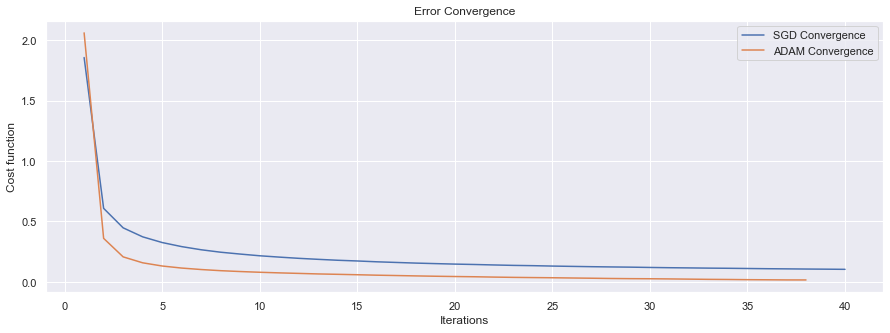

In [26]:
mlp_sgd_model

curve_1 = np.linspace(1, mlp_sgd_model.n_iter_, mlp_sgd_model.n_iter_)
curve_2 = np.linspace(1, mlp_adam_model.n_iter_, mlp_adam_model.n_iter_)

plt.plot(curve_1, mlp_sgd_model.loss_curve_, label = 'SGD Convergence' )
plt.plot(curve_2, mlp_adam_model.loss_curve_, label = 'ADAM Convergence')
plt.title('Error Convergence')
plt.ylabel('Cost function')
plt.xlabel('Iterations')
plt.legend()
plt.show()

<a id='step7'></a>
## Convolutional Neural Network

### CNN Model 1

In [28]:
def perform_cnn_1(fold, pca):
    start_time = timer()
    k = fold
    perform_pca = pca
    kf = KFold(n_splits=k, random_state=None)
    
    acc_scores = []
    cv_iteration = 1
    cv_pca_iteration = 1
    
    for train_index, test_index in kf.split(X):
        
        if perform_pca == False:
            print('\nTraining model and cross validate using fold #{}...\n ' .format(cv_iteration))
            cv_iteration += 1
        
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # y_train and y_test must be one-hot-encoded, i.e. they must have dimensions (no. of samples, 6)
        y_train = to_categorical(y_train, 6)
        y_test = to_categorical(y_test, 6)
        
        if perform_pca == True:
            print('\nTraining model with PCA and cross validate using fold #{}...\n ' .format(cv_pca_iteration))
            cv_pca_iteration += 1
            pca = PCA(n_components = 100) # n=100 is the usual consensus in HAR
            X_train = pca.fit_transform(X_train)
            X_test = pca.transform(X_test)
            pca.explained_variance_ratio_

        def cnn_1():
            model = Sequential()
            model.add(Dense(units=64, kernel_initializer='uniform', activation='relu', input_dim=X_train.shape[1]))
            model.add(Dense(units=128, kernel_initializer='uniform', activation='relu'))
            model.add(Flatten())
            model.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))
            model.add(Dense(units=6, kernel_initializer='uniform', activation='softmax'))
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
            return model
        
        cnn_model_1 = cnn_1()
        #print(cnn_model_1.summary())
        
        history = cnn_model_1.fit(X_train, y_train, batch_size=256, epochs=50, validation_data=(X_test, y_test))
        scores = cnn_model_1.evaluate(X_test, y_test, verbose=0)
        
        acc_scores.append(scores[1])
    
    end_time = timer()
    time_taken = end_time - start_time
    
    return acc_scores, history, cnn_model_1, time_taken

### CNN Model 1 <font color=red>without PCA</font>, evaluated using 5-fold cross validation

In [29]:
acc_scores_cnn_1, history_cnn_1, cnn_model_1, time_taken = perform_cnn_1(fold=5, pca=False)


Training model and cross validate using fold #1...
 
Epoch 1/50
33/33 [==============================] - 1s 28ms/step - loss: 1.5552 - accuracy: 0.4688 - val_loss: 0.8394 - val_accuracy: 0.5859
Epoch 2/50
33/33 [==============================] - 0s 4ms/step - loss: 0.6708 - accuracy: 0.7169 - val_loss: 0.4419 - val_accuracy: 0.8563
Epoch 3/50
33/33 [==============================] - 0s 3ms/step - loss: 0.2904 - accuracy: 0.8878 - val_loss: 0.3039 - val_accuracy: 0.8995
Epoch 4/50
33/33 [==============================] - 0s 4ms/step - loss: 0.1658 - accuracy: 0.9389 - val_loss: 0.2898 - val_accuracy: 0.9005
Epoch 5/50
33/33 [==============================] - 0s 4ms/step - loss: 0.1163 - accuracy: 0.9534 - val_loss: 0.2999 - val_accuracy: 0.9131
Epoch 6/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0877 - accuracy: 0.9672 - val_loss: 0.2672 - val_accuracy: 0.9296
Epoch 7/50
33/33 [==============================] - 0s 4ms/step - loss: 0.0668 - accuracy: 0.9777 - val_l

33/33 [==============================] - 0s 3ms/step - loss: 0.0610 - accuracy: 0.9753 - val_loss: 0.3283 - val_accuracy: 0.9083
Epoch 9/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0594 - accuracy: 0.9772 - val_loss: 0.3872 - val_accuracy: 0.9010
Epoch 10/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 0.9832 - val_loss: 0.3241 - val_accuracy: 0.9121
Epoch 11/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0431 - accuracy: 0.9847 - val_loss: 0.3550 - val_accuracy: 0.9049
Epoch 12/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9842 - val_loss: 0.3413 - val_accuracy: 0.9199
Epoch 13/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0421 - accuracy: 0.9826 - val_loss: 0.4349 - val_accuracy: 0.9010
Epoch 14/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9804 - val_loss: 0.3910 - val_accuracy: 0.9136
Epoch 15/50
33/33 [=======

Epoch 16/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9869 - val_loss: 0.0819 - val_accuracy: 0.9694
Epoch 17/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9855 - val_loss: 0.0702 - val_accuracy: 0.9752
Epoch 18/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9852 - val_loss: 0.1105 - val_accuracy: 0.9646
Epoch 19/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9849 - val_loss: 0.0868 - val_accuracy: 0.9680
Epoch 20/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9856 - val_loss: 0.1075 - val_accuracy: 0.9660
Epoch 21/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0605 - accuracy: 0.9765 - val_loss: 0.0806 - val_accuracy: 0.9694
Epoch 22/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.9876 - val_loss: 0.0773 - val_accuracy: 0.9738
Epoch 23/50
3

Epoch 24/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9935 - val_loss: 0.1476 - val_accuracy: 0.9519
Epoch 25/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9924 - val_loss: 0.1439 - val_accuracy: 0.9553
Epoch 26/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 0.1540 - val_accuracy: 0.9534
Epoch 27/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9937 - val_loss: 0.1967 - val_accuracy: 0.9442
Epoch 28/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9911 - val_loss: 0.1513 - val_accuracy: 0.9534
Epoch 29/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.9939 - val_loss: 0.1475 - val_accuracy: 0.9519
Epoch 30/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9965 - val_loss: 0.1567 - val_accuracy: 0.9553
Epoch 31/50
3

Epoch 32/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.1869 - val_accuracy: 0.9490
Epoch 33/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9916 - val_loss: 0.1893 - val_accuracy: 0.9480
Epoch 34/50
33/33 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 0.9952 - val_loss: 0.1966 - val_accuracy: 0.9475
Epoch 35/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9942 - val_loss: 0.2541 - val_accuracy: 0.9305
Epoch 36/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9924 - val_loss: 0.2032 - val_accuracy: 0.9456
Epoch 37/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9975 - val_loss: 0.1895 - val_accuracy: 0.9500
Epoch 38/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9922 - val_loss: 0.2563 - val_accuracy: 0.9393
Epoch 39/50
3

In [30]:
cnn_model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                35968     
_________________________________________________________________
dense_17 (Dense)             (None, 128)               8320      
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 6)                 390       
Total params: 52,934
Trainable params: 52,934
Non-trainable params: 0
_________________________________________________________________


In [31]:
print('CNN 1 - accuracy of each fold:\n {}'.format(acc_scores_cnn_1))
print('')
print('CNN 1 - average accuracy in 5-fold: {}'.format(np.mean(acc_scores_cnn_1)))
print('')
print('CNN 1 - standard deviation of accuracy in 5-fold: {}'.format(np.std(acc_scores_cnn_1)))
print('')
print('Time taken: {:.2f} seconds' .format(time_taken))

CNN 1 - accuracy of each fold:
 [0.9422330260276794, 0.920873761177063, 0.9752427339553833, 0.9601941704750061, 0.9524040818214417]

CNN 1 - average accuracy in 5-fold: 0.9501895546913147

CNN 1 - standard deviation of accuracy in 5-fold: 0.018195495906253308

Time taken: 30.57 seconds


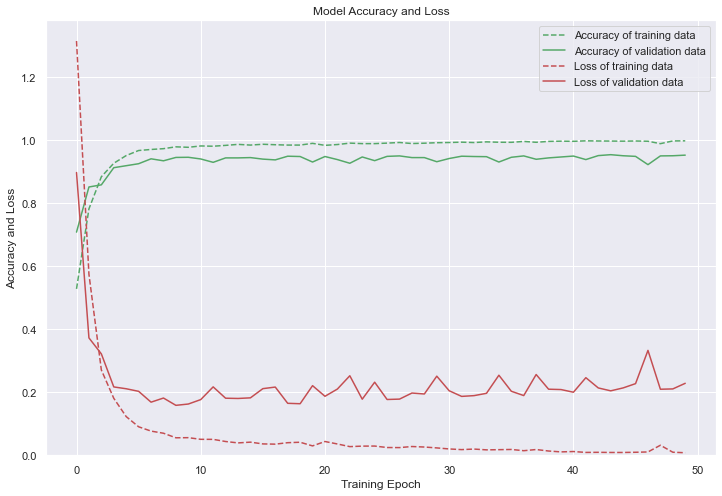

In [32]:
plt.figure(figsize=(12, 8))
plt.plot(history_cnn_1.history['accuracy'], "g--", label="Accuracy of training data")
plt.plot(history_cnn_1.history['val_accuracy'], "g", label="Accuracy of validation data")
plt.plot(history_cnn_1.history['loss'], "r--", label="Loss of training data")
plt.plot(history_cnn_1.history['val_loss'], "r", label="Loss of validation data")
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

### CNN Model 1 <font color=green>with PCA</font>, evaluated using 5-fold cross validation

In [33]:
acc_scores_cnn_1, history_cnn_1, cnn_model_1, time_taken = perform_cnn_1(fold=5, pca=True)


Training model with PCA and cross validate using fold #1...
 
Epoch 1/50
33/33 [==============================] - 1s 7ms/step - loss: 1.7133 - accuracy: 0.5046 - val_loss: 0.9483 - val_accuracy: 0.7451
Epoch 2/50
33/33 [==============================] - 0s 3ms/step - loss: 0.6723 - accuracy: 0.8696 - val_loss: 0.2322 - val_accuracy: 0.9218
Epoch 3/50
33/33 [==============================] - 0s 3ms/step - loss: 0.1355 - accuracy: 0.9527 - val_loss: 0.2186 - val_accuracy: 0.9248
Epoch 4/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0888 - accuracy: 0.9665 - val_loss: 0.2109 - val_accuracy: 0.9311
Epoch 5/50
33/33 [==============================] - 0s 2ms/step - loss: 0.0773 - accuracy: 0.9706 - val_loss: 0.2233 - val_accuracy: 0.9364
Epoch 6/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0614 - accuracy: 0.9778 - val_loss: 0.2490 - val_accuracy: 0.9330
Epoch 7/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0617 - accuracy: 0.9770

Epoch 8/50
33/33 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9825 - val_loss: 0.4434 - val_accuracy: 0.9049
Epoch 9/50
33/33 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.9867 - val_loss: 0.4544 - val_accuracy: 0.9063
Epoch 10/50
33/33 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9868 - val_loss: 0.4720 - val_accuracy: 0.9034
Epoch 11/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9901 - val_loss: 0.4834 - val_accuracy: 0.9078
Epoch 12/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9916 - val_loss: 0.5168 - val_accuracy: 0.9029
Epoch 13/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9927 - val_loss: 0.5163 - val_accuracy: 0.9063
Epoch 14/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9929 - val_loss: 0.5533 - val_accuracy: 0.9053
Epoch 15/50
33/

33/33 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9901 - val_loss: 0.1636 - val_accuracy: 0.9515
Epoch 16/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.2008 - val_accuracy: 0.9510
Epoch 17/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9932 - val_loss: 0.1810 - val_accuracy: 0.9568
Epoch 18/50
33/33 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9974 - val_loss: 0.1823 - val_accuracy: 0.9544
Epoch 19/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9980 - val_loss: 0.1862 - val_accuracy: 0.9568
Epoch 20/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9997 - val_loss: 0.2099 - val_accuracy: 0.9539
Epoch 21/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9995 - val_loss: 0.1950 - val_accuracy: 0.9563
Epoch 22/50
33/33 [======

33/33 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 0.9959 - val_loss: 0.2988 - val_accuracy: 0.9311
Epoch 23/50
33/33 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9971 - val_loss: 0.3063 - val_accuracy: 0.9306
Epoch 24/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.3184 - val_accuracy: 0.9320
Epoch 25/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9993 - val_loss: 0.3238 - val_accuracy: 0.9320
Epoch 26/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9984 - val_loss: 0.3327 - val_accuracy: 0.9335
Epoch 27/50
33/33 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.3479 - val_accuracy: 0.9306
Epoch 28/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.3557 - val_accuracy: 0.9316
Epoch 29/50
33/33 [======

33/33 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3397 - val_accuracy: 0.9354
Epoch 30/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3651 - val_accuracy: 0.9310
Epoch 31/50
33/33 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3540 - val_accuracy: 0.9344
Epoch 32/50
33/33 [==============================] - 0s 3ms/step - loss: 7.2014e-04 - accuracy: 1.0000 - val_loss: 0.3587 - val_accuracy: 0.9344
Epoch 33/50
33/33 [==============================] - 0s 3ms/step - loss: 6.6256e-04 - accuracy: 1.0000 - val_loss: 0.3670 - val_accuracy: 0.9335
Epoch 34/50
33/33 [==============================] - 0s 3ms/step - loss: 6.0270e-04 - accuracy: 1.0000 - val_loss: 0.3715 - val_accuracy: 0.9354
Epoch 35/50
33/33 [==============================] - 0s 3ms/step - loss: 5.2659e-04 - accuracy: 1.0000 - val_loss: 0.3693 - val_accuracy: 0.9330
Epoch 36/

In [34]:
cnn_model_1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_37 (Dense)             (None, 128)               8320      
_________________________________________________________________
flatten_9 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_39 (Dense)             (None, 6)                 390       
Total params: 23,430
Trainable params: 23,430
Non-trainable params: 0
_________________________________________________________________


In [35]:
print('CNN 1 - accuracy of each fold:\n {}'.format(acc_scores_cnn_1))
print('')
print('CNN 1 - average accuracy in 5-fold: {}'.format(np.mean(acc_scores_cnn_1)))
print('')
print('CNN 1 - standard deviation of accuracy in 5-fold: {}'.format(np.std(acc_scores_cnn_1)))
print('')
print('Time taken: {:.2f} seconds' .format(time_taken))

CNN 1 - accuracy of each fold:
 [0.939805805683136, 0.9063106775283813, 0.9572815299034119, 0.933009684085846, 0.9334628582000732]

CNN 1 - average accuracy in 5-fold: 0.9339741110801697

CNN 1 - standard deviation of accuracy in 5-fold: 0.01639330039347346

Time taken: 26.66 seconds


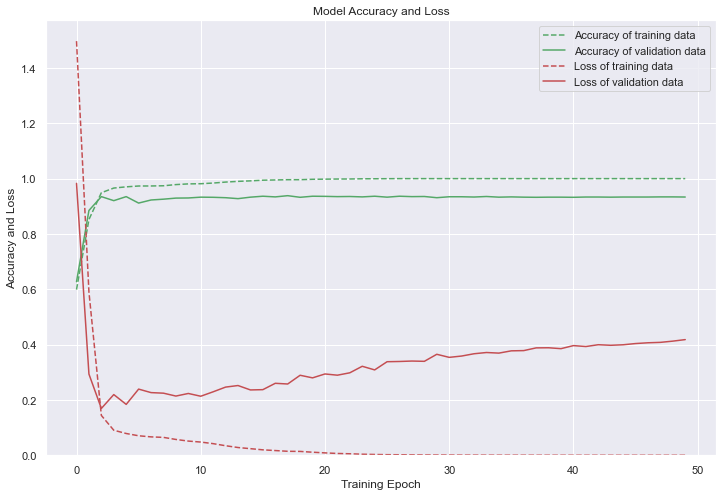

In [36]:
plt.figure(figsize=(12, 8))
plt.plot(history_cnn_1.history['accuracy'], "g--", label="Accuracy of training data")
plt.plot(history_cnn_1.history['val_accuracy'], "g", label="Accuracy of validation data")
plt.plot(history_cnn_1.history['loss'], "r--", label="Loss of training data")
plt.plot(history_cnn_1.history['val_loss'], "r", label="Loss of validation data")
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

<a id='step10'></a>
### CNN Model 2 <font color=red>without PCA</font>, evaluated using 5-fold cross validation

In [37]:
train_histories = []

In [38]:
def perform_cnn_2(fold, pca):
    start_time = timer()
    k = fold
    perform_pca = pca
    kf = KFold(n_splits=k, random_state=None)
#    kf = StratifiedKFold(n_splits=k, random_state=None)  # choose k-fold or stratified k-fold
    
    acc_scores = []
    cv_iteration = 1
    cv_pca_iteration = 1
    train_histories.clear()
    
    for train_index, test_index in kf.split(X, y):
        
        if perform_pca == False:
            print('\nTraining model and cross validate using fold #{}...\n ' .format(cv_iteration))
            cv_iteration += 1
        
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
                
        y_train = to_categorical(y_train, num_classes=6)
        y_test = to_categorical(y_test, num_classes=6)     
        
        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
        
        if perform_pca == True:
            print('\nTraining model with PCA and cross validate using fold #{}...\n ' .format(cv_pca_iteration))
            cv_pca_iteration += 1
            pca = PCA(n_components = 100) # n=100 is the usual consensus in HAR
            X_train = pca.fit_transform(X_train)
            X_test = pca.transform(X_test)
            pca.explained_variance_ratio_

        def cnn_2():
            model = Sequential()
            model.add(Conv1D(filters=32, kernel_size=4, activation='relu', input_shape=X_train[0].shape))
            model.add(Conv1D(filters=16, kernel_size=4, activation='relu'))
            model.add(Dropout(0.2))
            model.add(MaxPooling1D(pool_size=2))
            model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
            model.add(Dropout(0.2))
            model.add(Conv1D(filters=8, kernel_size=3, activation='relu'))
            model.add(Flatten())
            model.add(Dense(16, activation='relu'))
            model.add(Dense(6, activation='softmax'))
            model.compile(loss='categorical_crossentropy', optimizer=Adam(lr = 0.001), metrics=['accuracy'])
            return model

        cnn_model_2 = cnn_2()
        print(cnn_model_2.summary())
        
        checkpoint_filepath="W7_HAR_weights.hdf5"
                
        my_callbacks = [
            EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, min_delta=1),
            ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, min_delta=0.0001, patience=1, verbose=1),
            ModelCheckpoint(filepath = checkpoint_filepath, save_weights_only = True, monitor = 'val_accuracy',
                            verbose=1, save_best_only = True, mode='max')  
        ]   
        
        
        history = cnn_model_2.fit(X_train, y_train, batch_size=64, epochs=30, validation_data=(X_test, y_test),
                                 callbacks=[my_callbacks])
        scores = cnn_model_2.evaluate(X_test, y_test, batch_size=64, verbose=0)
        acc_scores.append(scores[1])
        train_histories.append(history.history)
        
#        np.save('my_history.npy', history.history)

#         with open('/tmp/trainHistoryDict', 'wb') as file_pi:
#             pickle.dump(history.history, file_pi)
                      
    end_time = timer()
    time_taken = end_time - start_time
    
    return acc_scores, cnn_model_2, time_taken

In [39]:
acc_scores_cnn_2, cnn_model_2, time_taken = perform_cnn_2(fold=5, pca=False)


Training model and cross validate using fold #1...
 
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 558, 32)           160       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 555, 16)           2064      
_________________________________________________________________
dropout (Dropout)            (None, 555, 16)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 277, 16)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 275, 16)           784       
_________________________________________________________________
dropout_1 (Dropout)          (None, 275, 16)           0         
_________________________________________________________________

129/129 [==============================] - 8s 55ms/step - loss: 0.9475 - accuracy: 0.6123 - val_loss: 0.4169 - val_accuracy: 0.8413

Epoch 00001: val_accuracy improved from -inf to 0.84126, saving model to W7_HAR_weights.hdf5
Epoch 2/30
129/129 [==============================] - 7s 54ms/step - loss: 0.1930 - accuracy: 0.9224 - val_loss: 0.3066 - val_accuracy: 0.8956

Epoch 00002: val_accuracy improved from 0.84126 to 0.89563, saving model to W7_HAR_weights.hdf5
Epoch 3/30
129/129 [==============================] - 7s 54ms/step - loss: 0.1369 - accuracy: 0.9469 - val_loss: 0.3331 - val_accuracy: 0.8786

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00003: val_accuracy did not improve from 0.89563
Epoch 4/30
129/129 [==============================] - 7s 57ms/step - loss: 0.0943 - accuracy: 0.9601 - val_loss: 0.3279 - val_accuracy: 0.9019

Epoch 00004: val_accuracy improved from 0.89563 to 0.90194, saving model to W7_HAR_weights.hdf5
Epoch 5/30
12

129/129 [==============================] - 7s 56ms/step - loss: 0.1313 - accuracy: 0.9499 - val_loss: 0.1589 - val_accuracy: 0.9354

Epoch 00004: val_accuracy improved from 0.93010 to 0.93544, saving model to W7_HAR_weights.hdf5
Epoch 5/30
129/129 [==============================] - 8s 58ms/step - loss: 0.0982 - accuracy: 0.9593 - val_loss: 0.1853 - val_accuracy: 0.9311

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00005: val_accuracy did not improve from 0.93544
Epoch 6/30
129/129 [==============================] - 8s 59ms/step - loss: 0.0837 - accuracy: 0.9669 - val_loss: 0.1533 - val_accuracy: 0.9432

Epoch 00006: val_accuracy improved from 0.93544 to 0.94320, saving model to W7_HAR_weights.hdf5
Epoch 7/30
129/129 [==============================] - 8s 61ms/step - loss: 0.0748 - accuracy: 0.9732 - val_loss: 0.1380 - val_accuracy: 0.9442

Epoch 00007: val_accuracy improved from 0.94320 to 0.94417, saving model to W7_HAR_weights.hdf5
Epoch 8/30

129/129 [==============================] - 7s 58ms/step - loss: 0.0671 - accuracy: 0.9771 - val_loss: 0.1369 - val_accuracy: 0.9461

Epoch 00007: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 00007: val_accuracy did not improve from 0.94757
Epoch 8/30
129/129 [==============================] - 7s 58ms/step - loss: 0.0730 - accuracy: 0.9706 - val_loss: 0.1369 - val_accuracy: 0.9461

Epoch 00008: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.

Epoch 00008: val_accuracy did not improve from 0.94757
Epoch 9/30
129/129 [==============================] - 7s 54ms/step - loss: 0.0743 - accuracy: 0.9722 - val_loss: 0.1369 - val_accuracy: 0.9461

Epoch 00009: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-10.

Epoch 00009: val_accuracy did not improve from 0.94757
Epoch 10/30
129/129 [==============================] - 7s 52ms/step - loss: 0.0715 - accuracy: 0.9744 - val_loss: 0.1369 - val_accuracy: 0.9461

Epoch 00010: ReduceLROnPla

129/129 [==============================] - 7s 54ms/step - loss: 0.0711 - accuracy: 0.9708 - val_loss: 0.1201 - val_accuracy: 0.9543

Epoch 00010: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 00010: val_accuracy did not improve from 0.95483
Epoch 11/30
129/129 [==============================] - 7s 51ms/step - loss: 0.0729 - accuracy: 0.9706 - val_loss: 0.1201 - val_accuracy: 0.9543

Epoch 00011: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.

Epoch 00011: val_accuracy did not improve from 0.95483
Epoch 12/30
129/129 [==============================] - 7s 51ms/step - loss: 0.0686 - accuracy: 0.9749 - val_loss: 0.1201 - val_accuracy: 0.9543

Epoch 00012: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-10.

Epoch 00012: val_accuracy did not improve from 0.95483
Epoch 13/30
129/129 [==============================] - 6s 49ms/step - loss: 0.0722 - accuracy: 0.9734 - val_loss: 0.1201 - val_accuracy: 0.9543

Epoch 00013: ReduceLROnP

In [40]:
print('CNN 2 - accuracy of each fold:\n {}'.format(acc_scores_cnn_2))
print('')
print('CNN 2 - average accuracy in 5-fold: {}'.format(np.mean(acc_scores_cnn_2)))
print('')
print('CNN 2 - standard deviation of accuracy in 5-fold: {}'.format(np.std(acc_scores_cnn_2)))
print('')
print('Time taken: {:.2f} seconds' .format(time_taken))

CNN 2 - accuracy of each fold:
 [0.9436893463134766, 0.9111650586128235, 0.9480582475662231, 0.9461165070533752, 0.954346776008606]

CNN 2 - average accuracy in 5-fold: 0.9406751871109009

CNN 2 - standard deviation of accuracy in 5-fold: 0.015172097594351787

Time taken: 754.32 seconds


### Training histories for cross-validation using fold 1 to 5

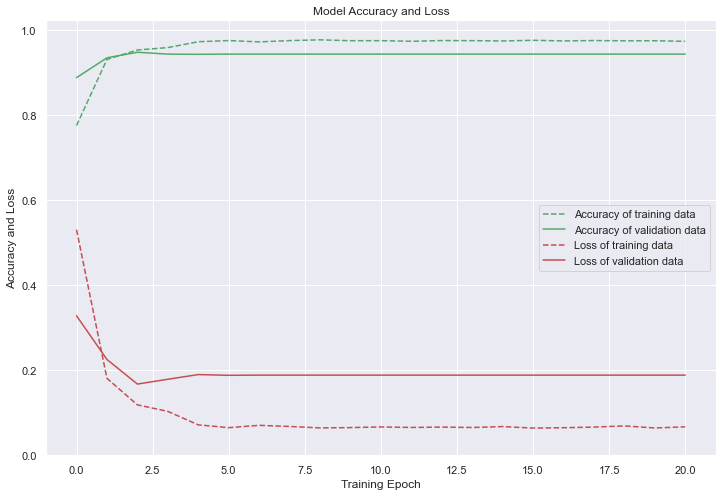

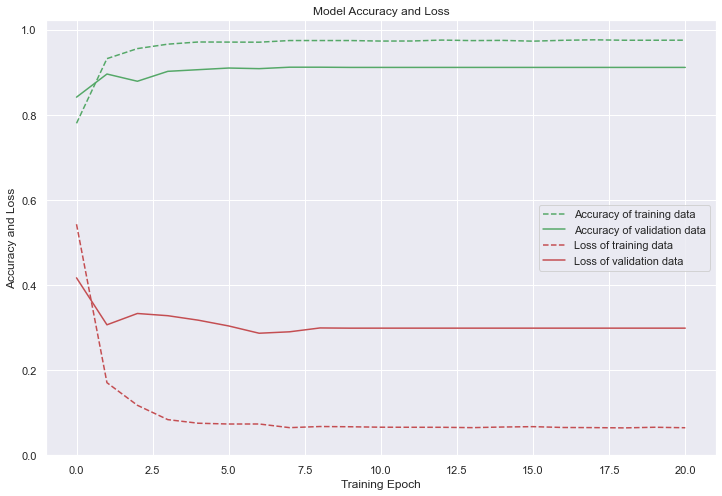

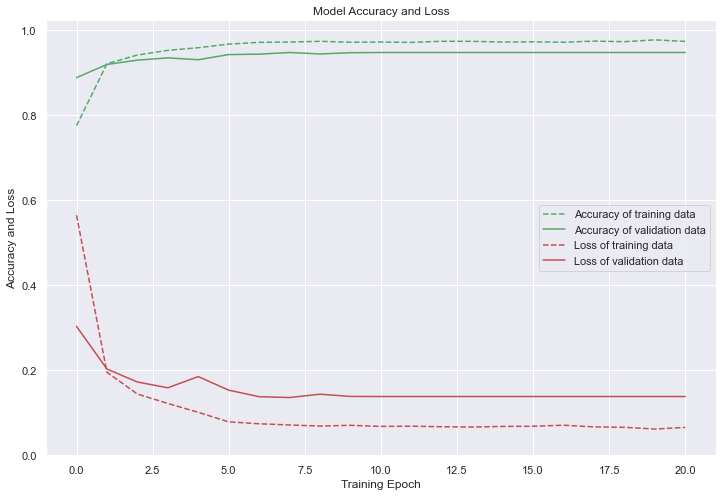

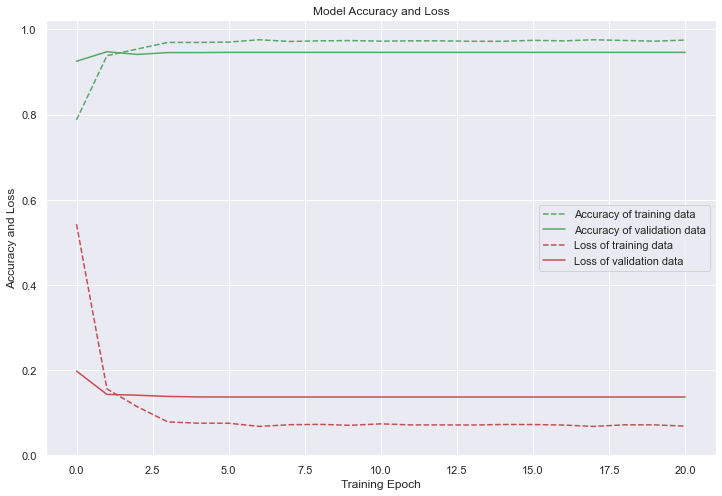

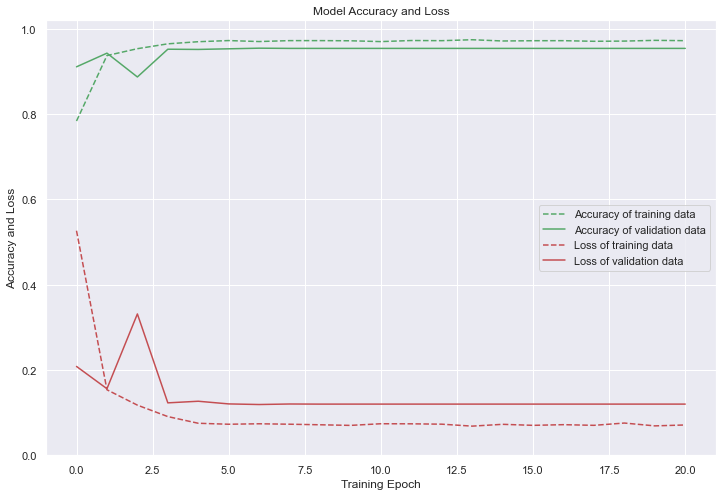

In [65]:
for history in train_histories:
    plt.figure(figsize=(12, 8))
    plt.plot(history['accuracy'], "g--", label="Accuracy of training data")
    plt.plot(history['val_accuracy'], "g", label="Accuracy of validation data")
    plt.plot(history['loss'], "r--", label="Loss of training data")
    plt.plot(history['val_loss'], "r", label="Loss of validation data")
    plt.title('Model Accuracy and Loss')
    plt.ylabel('Accuracy and Loss')
    plt.xlabel('Training Epoch')
    plt.ylim(0)
    plt.legend()
    plt.show()